In [6]:
from gausspy_pipeline import GausspyPipeline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
# 讀 FITS 檔時
from astropy.io import fits


# 1. 建立 pipeline 並初始化所有參數
pipeline = GausspyPipeline(
    cube_file='../datacubes/spw0.fits',
    v1=700, v2=950, x1=220, x2=240, y1=100, y2=120,
    alpha1=0.1, alpha2=12.0, snr_thresh=3.0,
    stack_vrange=(-200, 200), stack_dv=0.2
)

# pipeline.prepare_input()
# pipeline.run_decomposition()
# pipeline.count_fits()


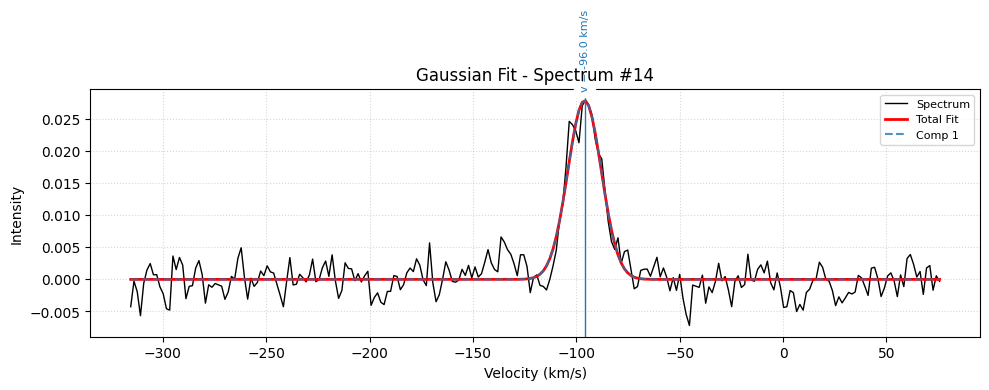

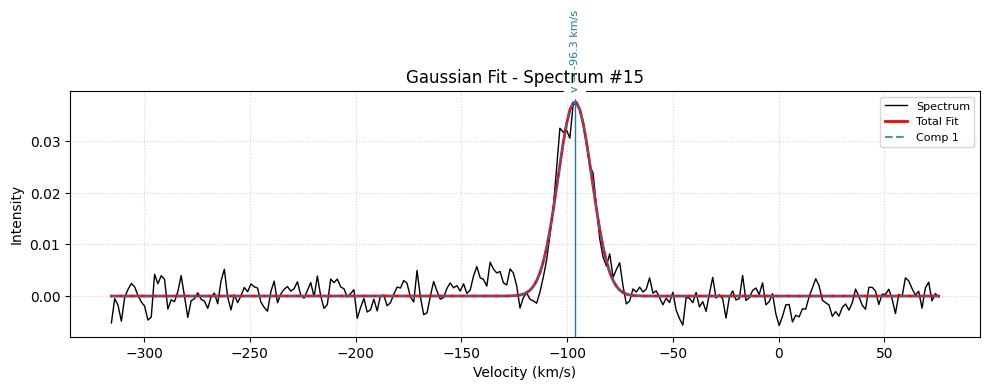

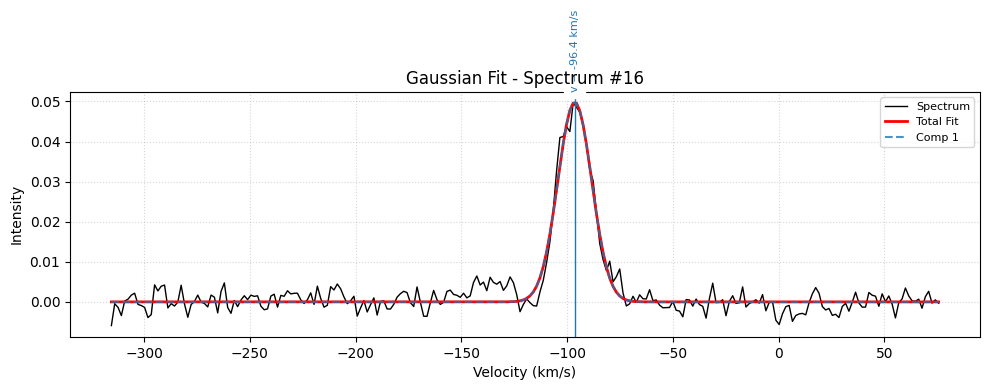

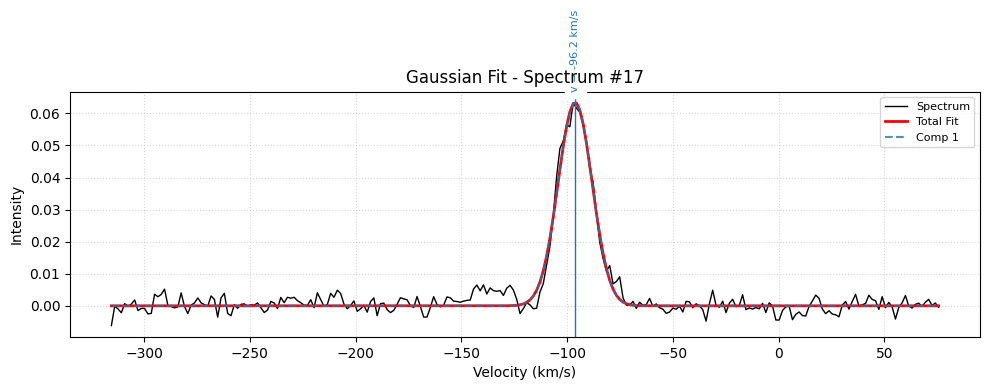

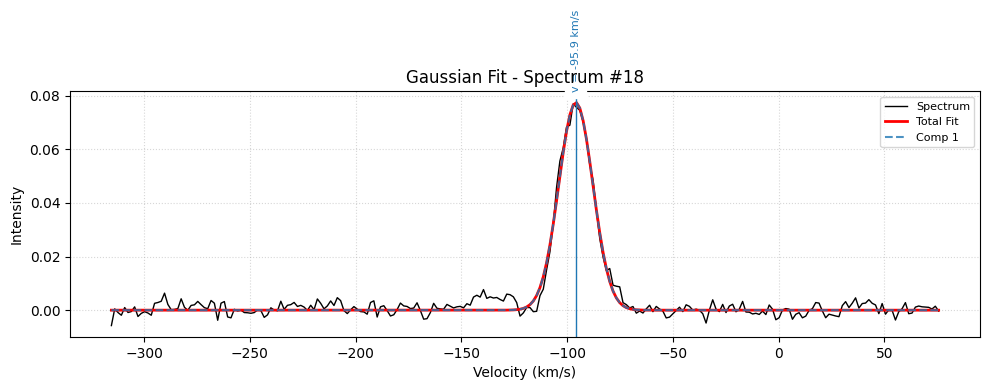

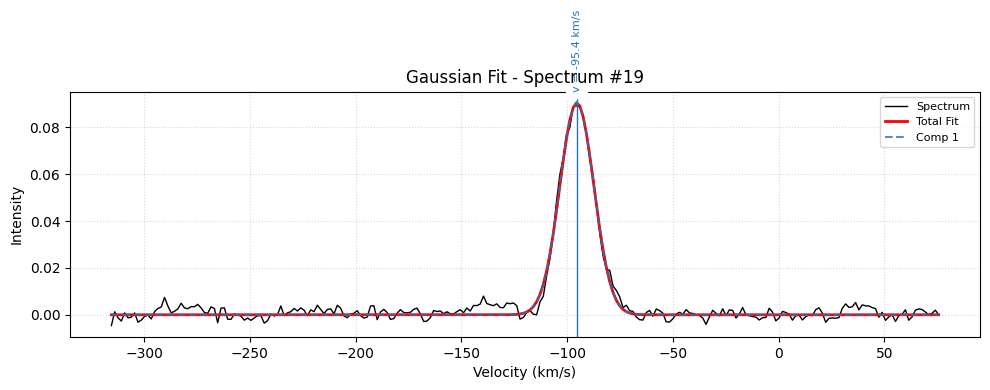

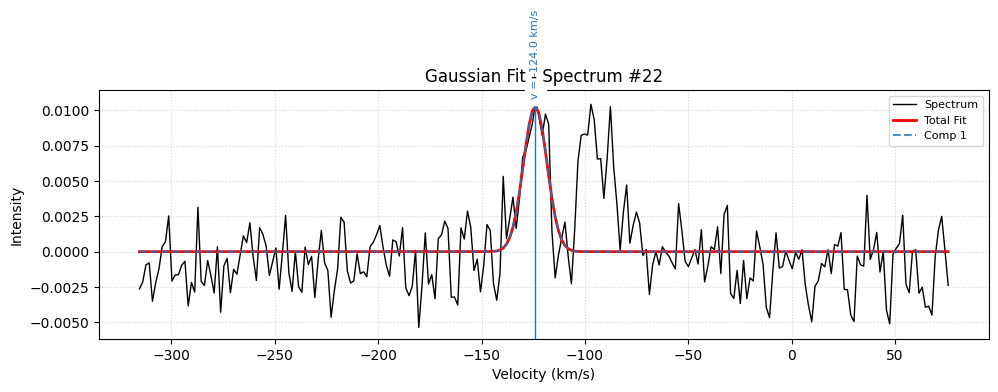

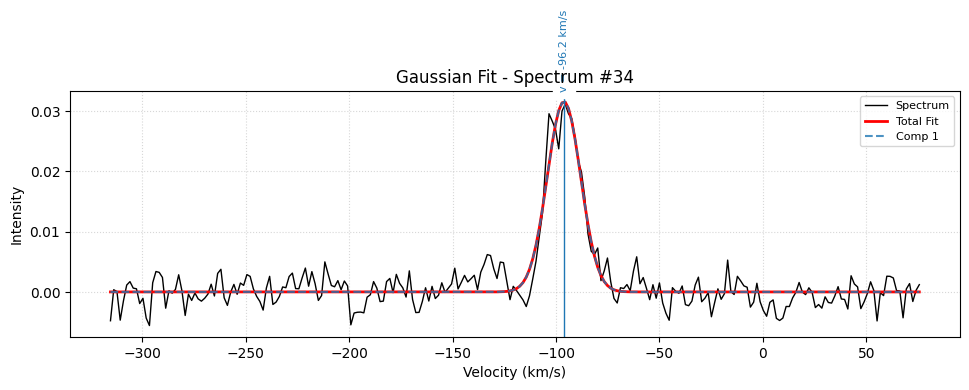

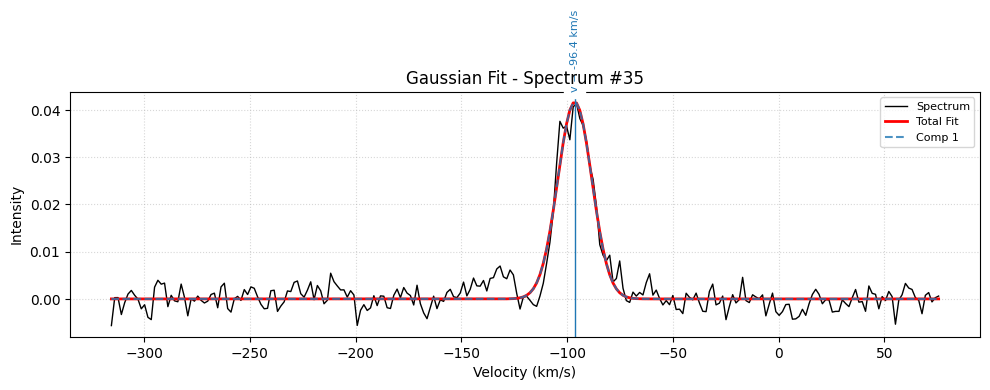

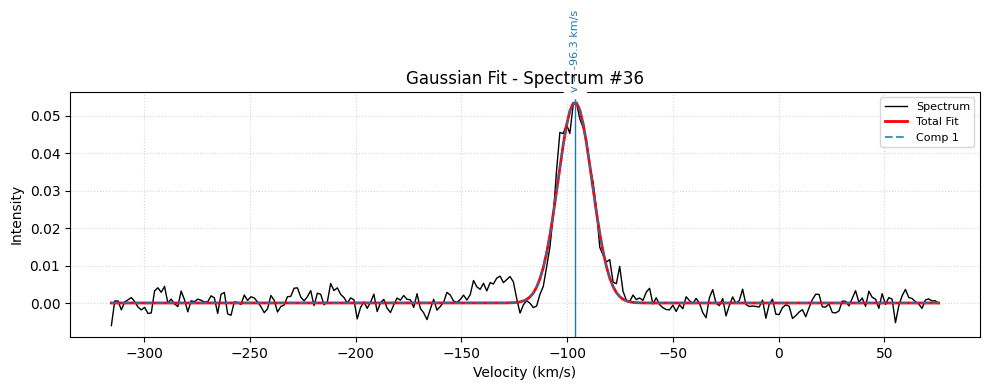

Plotted 10 fitted spectra.


In [3]:
pipeline.plot_fits()

Stacking done: 327/400 spectra used (81.8%)
Stacked 400 raw spectra.


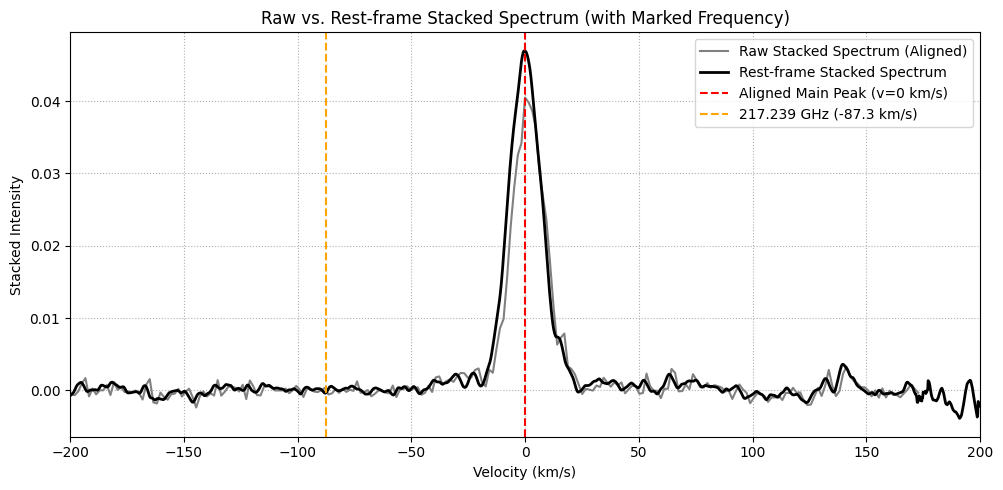

In [18]:
# Rest-frame (高斯對齊) 堆疊
v_rest, mean_rest, std_rest = pipeline.stack_restframe(plot=False)

# Raw 直接堆疊
v_raw, mean_raw, std_raw = pipeline.stack_raw_spectra(plot=False)

# 1. 對齊 raw spectrum 主峰
peak_idx = np.nanargmax(mean_raw)
v_peak_raw = v_raw[peak_idx]
v_raw_aligned = v_raw - v_peak_raw  # 將主峰對齊到 v=0 km/s

# 2. 設定頻率（單位 GHz）
c = 299792.458
freq_raw0 = 217.104980   # raw spectrum 的 v=0 中心頻率
target_freq = 217.238530 # 要標註的頻率

# 3. 算頻率標記線的速度位置
v_target_raw = c * (1 - target_freq / freq_raw0)
v_target_raw_aligned = v_target_raw - v_peak_raw

# 4. 畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(v_raw_aligned, mean_raw, label='Raw Stacked Spectrum (Aligned)', color='gray', linewidth=1.5)
plt.plot(v_rest, mean_rest, label='Rest-frame Stacked Spectrum', color='black', linewidth=2)
plt.axvline(0, linestyle='--', color='red', label='Aligned Main Peak (v=0 km/s)')
plt.axvline(v_target_raw_aligned, linestyle='--', color='orange',
            label=f'{target_freq:.3f} GHz ({v_target_raw_aligned:.1f} km/s)')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Stacked Intensity')
plt.title('Raw vs. Rest-frame Stacked Spectrum (with Marked Frequency)')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.xlim(-200, 200)
plt.show()
